# 집값 예측 경진대회 EDA
- id : 데이터 고유 id
- OverallQual : 전반적 재료와 마감 품질
- YearBuilt : 완공 연도
- YearRemodAdd : 리모델링 연도
- ExterQual : 외관 재료 품질
- BsmtQual : 지하실 높이
- TotalBsmtSF : 지하실 면적 
- 1stFlrSF : 1층 면적 
- GrLivArea : 지상층 생활 면적
- FullBath : 지상층 화장실 개수 
- KitchenQual : 부억 품질 
- GarageYrBlt : 차고 완공 연도
- GarageCars: 차고 자리 개수
- GarageArea: 차고 면적 
- target : 집값(달러 단위)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from scipy.stats import skew

In [2]:
train = pd.read_csv('./data/train.csv')
train.drop(['id'],axis=1, inplace = True)
train.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


## Null data 및 데이터 타입 분석

In [3]:
print(len(train))
train.info()

1350
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1350 non-null   int64 
 1   Gr Liv Area     1350 non-null   int64 
 2   Exter Qual      1350 non-null   object
 3   Garage Cars     1350 non-null   int64 
 4   Garage Area     1350 non-null   int64 
 5   Kitchen Qual    1350 non-null   object
 6   Total Bsmt SF   1350 non-null   int64 
 7   1st Flr SF      1350 non-null   int64 
 8   Bsmt Qual       1350 non-null   object
 9   Full Bath       1350 non-null   int64 
 10  Year Built      1350 non-null   int64 
 11  Year Remod/Add  1350 non-null   int64 
 12  Garage Yr Blt   1350 non-null   int64 
 13  target          1350 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 147.8+ KB


분석
- NUll 값 없음
  - 전처리 X
- 카테고리형 데이터 : Exter Qual, KitchenQual, Bsmt Qual
- 수치형 데이터
  - 'Overall Qual', 'Gr Liv Area', 'Garage Cars','Garage Area', 'Total Bsmt SF', '1st Flr SF','Full Bath', 
  - 'Year Built', 'Year Remod/Add' , 'Garage Yr Blt' 

In [4]:
feature_int = ['Overall Qual', 'Gr Liv Area', 'Garage Cars','Garage Area', 'Total Bsmt SF', 
                '1st Flr SF','Full Bath', 'Year Built', 'Year Remod/Add','Garage Yr Blt']
feature_category = ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']

## 카테고리형 데이터 처리

In [5]:
# ExterQual : 외관 재료 품질
train['Exter Qual'].unique()

array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object)

<AxesSubplot:xlabel='Exter Qual', ylabel='target'>

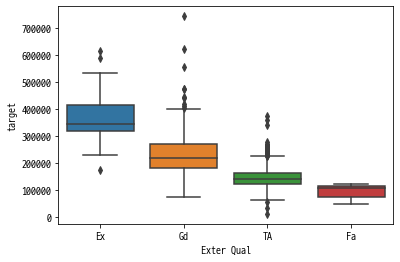

In [6]:
sns.boxplot(x = train['Exter Qual'], y = train['target'])

In [7]:
# KitchenQual : 부억 품질 
train['Kitchen Qual'].unique()

array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object)

<AxesSubplot:xlabel='Kitchen Qual', ylabel='target'>

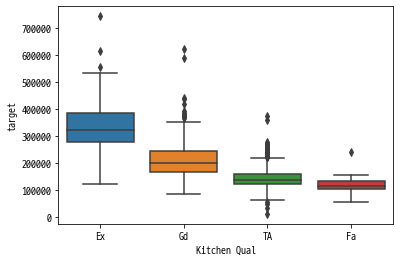

In [8]:
sns.boxplot(x = train['Kitchen Qual'], y = train['target'])

In [9]:
# BsmtQual : 지하실 높이
train['Bsmt Qual'].unique()

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

<AxesSubplot:xlabel='Bsmt Qual', ylabel='target'>

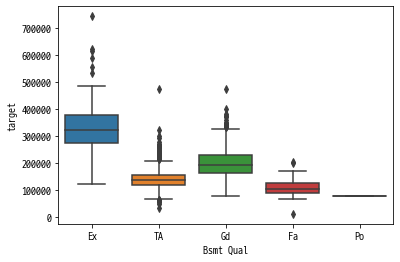

In [10]:
sns.boxplot(x = train['Bsmt Qual'], y = train['target'])

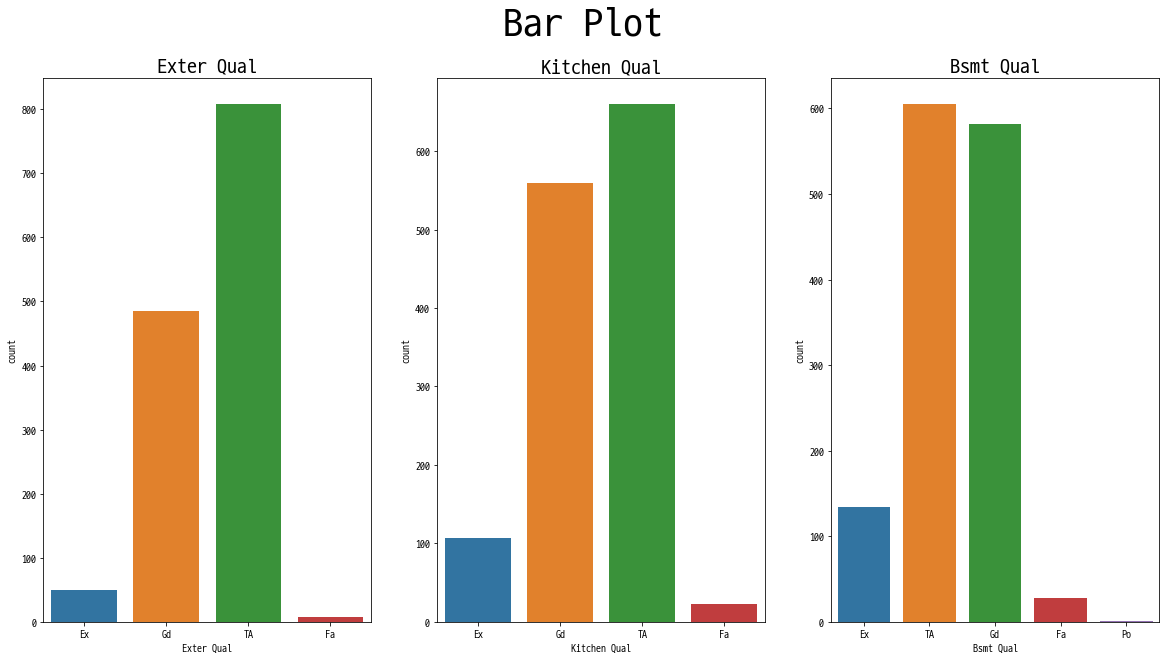

In [11]:
plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot", fontsize=40)

for idx, t in enumerate(feature_category, 1):
    ax = plt.subplot(1, 3, idx)
    plt.title(t, fontsize=20)
    sns.countplot(x = train[t], ax = ax)
plt.show()

분석
- TA, GD에 데이터가 편중되어 있음

## 수치형 데이터

### target의 왜도

In [12]:
print(f'로그 변환 전 타겟 왜도 = {train.target.skew()} / 로그 변환 후 타겟 왜도 = {np.log1p(train.target).skew()}')

로그 변환 전 타겟 왜도 = 1.7175856695235343 / 로그 변환 후 타겟 왜도 = 0.08072456642342425


In [13]:
train['target'] = np.log1p(train['target'])

### 상관분석

In [14]:
train[['Overall Qual', 'target']].corr().iloc[0,1].round(2)

0.82

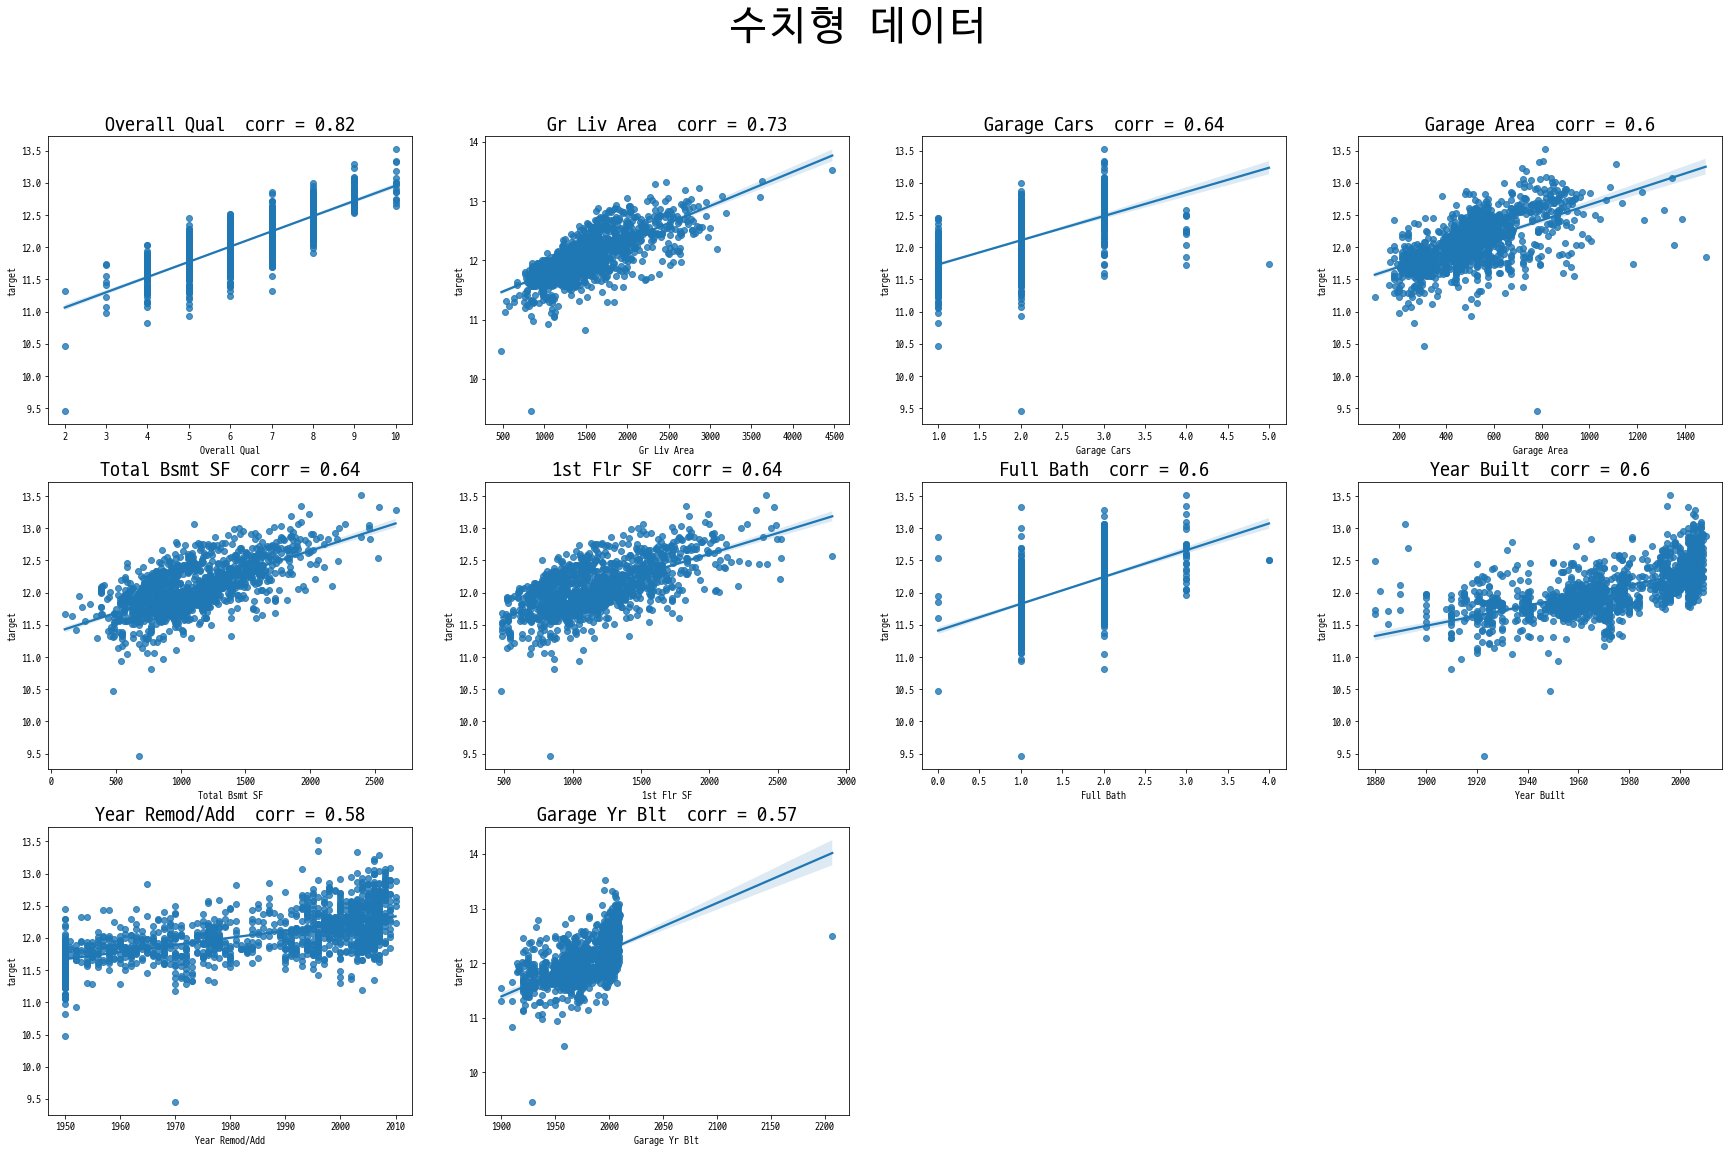

In [15]:
plt.figure(figsize=(30,18))
plt.suptitle("수치형 데이터", fontsize=40)

for idx, t in enumerate(feature_int, 1):
    ax = plt.subplot(3, 4, idx)
    plt.title(t + f"  corr = {train[[t, 'target']].corr().iloc[0,1].round(2)}", fontsize=20)
    sns.regplot(x = train[t], y = train['target'], ax = ax)
plt.show()

In [16]:
train[['Garage Cars', 'Garage Area']].corr()

,Garage Cars,Garage Area
Garage Cars,1.000000,0.840054
Garage Area,0.840054,1.000000


In [17]:
train['Garage Yr Blt'].sort_values(ascending = False)

254    2207
687    2010
511    2009
259    2009
265    2009
       ... 
65     1910
404    1910
873    1910
246    1900
896    1900
Name: Garage Yr Blt, Length: 1350, dtype: int64

분석
- Full bath : target과 무관
- Garage Cars : 특정시점(3대)까지는 비레하나, 이후에는 오히려 집값 감소
- Garage Area 는 Garage Cars와 상관도가 매우 높아(0.84) 둘 중 하나만 사용하는 것이 좋을 것이라고 생각됨
- Year Remod/Add : 1950 값이 지나치게 많음. 데이터 오염이 의심됨
- Garage Yr Blt : 2207년 값이 존재. 데이터 오류

In [18]:
# 중복값 처리
train = train.drop_duplicates()
print(len(train))
train.head()

1349


,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,12.864243
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,12.175619
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,11.719948
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,11.813037
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,12.429220


In [19]:
# Year Remod/Add 1950이 너무 많은 문제
# 리모델링 연도가 불명일 경우 1950년으로 체크했을 가능성이 있음
# 리모델링 연도가 모두 건설 년도 이후이므로 데이터를 그대로 사용
train[train['Year Remod/Add'] < train['Year Built']]

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target


In [20]:
train[train['Garage Yr Blt'] == 2207]

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
254,8,1564,Gd,2,502,Ex,1546,1564,Gd,2,2006,2007,2207,12.496131


In [21]:
train = train.drop(255) #254번 행을 삭제했습니다.
train.loc[250:260] 

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
250,8,2340,Gd,3,787,Gd,1236,1236,Gd,2,1996,1996,1996,12.631344
251,4,875,TA,2,728,Gd,385,875,TA,1,1972,2006,1975,11.669938
252,5,988,TA,1,276,TA,876,988,TA,1,1950,1950,1950,11.686887
253,5,793,TA,1,240,Fa,793,793,TA,1,1945,1950,1945,11.635152
254,8,1564,Gd,2,502,Ex,1546,1564,Gd,2,2006,2007,2207,12.496131
256,7,1958,Gd,2,499,Gd,779,1029,Gd,2,1994,2001,1994,12.301387
257,5,1211,TA,2,576,TA,864,1211,TA,1,1962,2002,1972,11.877576
258,7,1802,TA,1,216,TA,793,901,Fa,1,1920,1950,1920,12.206578
259,8,1836,Gd,2,517,Gd,1836,1836,Gd,2,2008,2009,2009,12.485600
260,6,1314,Gd,2,440,Gd,1314,1314,Gd,2,2006,2006,2006,12.080696


In [22]:
train.reset_index(inplace = True, drop = True)
train.loc[250:260]

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
250,8,2340,Gd,3,787,Gd,1236,1236,Gd,2,1996,1996,1996,12.631344
251,4,875,TA,2,728,Gd,385,875,TA,1,1972,2006,1975,11.669938
252,5,988,TA,1,276,TA,876,988,TA,1,1950,1950,1950,11.686887
253,5,793,TA,1,240,Fa,793,793,TA,1,1945,1950,1945,11.635152
254,8,1564,Gd,2,502,Ex,1546,1564,Gd,2,2006,2007,2207,12.496131
255,7,1958,Gd,2,499,Gd,779,1029,Gd,2,1994,2001,1994,12.301387
256,5,1211,TA,2,576,TA,864,1211,TA,1,1962,2002,1972,11.877576
257,7,1802,TA,1,216,TA,793,901,Fa,1,1920,1950,1920,12.206578
258,8,1836,Gd,2,517,Gd,1836,1836,Gd,2,2008,2009,2009,12.485600
259,6,1314,Gd,2,440,Gd,1314,1314,Gd,2,2006,2006,2006,12.080696


### 카테고리 데이터 

In [23]:
dic_four = {}
for x, y in zip(['Ex', 'Gd', 'TA', 'Fa'], [4,3,2,1]):
    dic_four[x] = y
train['Exter Qual encoded'] = train['Exter Qual'].map(dic_four)
train['Kitchen Qual encoded'] = train['Kitchen Qual'].map(dic_four)

In [24]:
dic_five = {}
for x, y in zip(['Ex', 'TA', 'Gd', 'Fa', 'Po'], [5,3,4,2,1]):
    dic_five[x] = y
train['Bsmt Qual encoded'] = train['Bsmt Qual'].map(dic_five)

In [25]:
train.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target,Exter Qual encoded,Kitchen Qual encoded,Bsmt Qual encoded
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,12.864243,4,4,5
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,12.175619,3,3,5
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,11.719948,2,2,3
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,11.813037,2,3,3
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,12.429220,3,3,4


In [26]:
#%pip install pycaret

In [27]:
train.drop(feature_category,axis=1, inplace = True)
train.head()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target,Exter Qual encoded,Kitchen Qual encoded,Bsmt Qual encoded
0,10,2392,3,968,2392,2392,2,2003,2003,2003,12.864243,4,4,5
1,7,1352,2,466,1352,1352,2,2006,2007,2006,12.175619,3,3,5
2,5,900,1,288,864,900,1,1967,1967,1967,11.719948,2,2,3
3,5,1174,2,576,680,680,1,1900,2006,2000,11.813037,2,3,3
4,7,1958,3,936,1026,1026,2,2005,2005,2005,12.429220,3,3,4


In [28]:
train

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target,Exter Qual encoded,Kitchen Qual encoded,Bsmt Qual encoded
0,10,2392,3,968,2392,2392,2,2003,2003,2003,12.864243,4,4,5
1,7,1352,2,466,1352,1352,2,2006,2007,2006,12.175619,3,3,5
2,5,900,1,288,864,900,1,1967,1967,1967,11.719948,2,2,3
3,5,1174,2,576,680,680,1,1900,2006,2000,11.813037,2,3,3
4,7,1958,3,936,1026,1026,2,2005,2005,2005,12.429220,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,6,1756,2,422,872,888,2,1996,1997,1996,12.225880,3,2,5
1344,9,2748,3,850,1850,1850,2,2006,2006,2006,12.873905,3,4,5
1345,5,1214,1,318,1214,1214,2,1967,1967,1967,11.870607,2,2,3
1346,5,894,2,440,864,894,1,1974,1974,1974,11.782960,2,2,4


In [29]:
from pycaret.regression import *
reg = setup(data = train, target = 'target', normalize = True, session_id = 0 )

,Description,Value
0,session_id,0
1,Target,target
2,Original Data,"(1348, 14)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(943, 38)"


In [30]:
def NMAE(true, pred): # NMAE의 경우 pycaret에서 지원하지 않습니다. 
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score 

In [31]:
# add metric을 사용하면 pycaret에 custom metric을 사용할 수 있습니다!
add_metric('NMAE', 'NMAE', NMAE, greater_is_better = False) 

Name                                                       NMAE
Display Name                                               NMAE
Score Function            <function NMAE at 0x0000020CF8436280>
Scorer               make_scorer(NMAE, greater_is_better=False)
Target                                                     pred
Args                                                         {}
Greater is Better                                         False
Custom                                                     True
Name: NMAE, dtype: object

In [32]:
best = compare_models(sort= 'NMAE',n_select=3) #상위 모델 3개를 선택합니다

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,NMAE,TT (Sec)
ridge,Ridge Regression,0.0997,0.0208,0.1403,0.8695,0.0110,0.0083,0.0083,0.0080
br,Bayesian Ridge,0.1008,0.0216,0.1433,0.8650,0.0112,0.0084,0.0083,0.0060
lr,Linear Regression,0.1010,0.0209,0.1426,0.8657,0.0112,0.0084,0.0084,0.7730
gbr,Gradient Boosting Regressor,0.1008,0.0231,0.1450,0.8616,0.0113,0.0084,0.0084,0.0680
rf,Random Forest Regressor,0.1024,0.0245,0.1499,0.8521,0.0117,0.0086,0.0085,0.1500
huber,Huber Regressor,0.1034,0.0261,0.1571,0.8314,0.0123,0.0086,0.0086,0.0140
lightgbm,Light Gradient Boosting Machine,0.1057,0.0261,0.1543,0.8434,0.0120,0.0088,0.0088,0.2020
et,Extra Trees Regressor,0.1070,0.0275,0.1584,0.8360,0.0124,0.0090,0.0089,0.1330
knn,K Neighbors Regressor,0.1149,0.0299,0.1663,0.8168,0.0130,0.0096,0.0095,0.0100
omp,Orthogonal Matching Pursuit,0.1246,0.0326,0.1765,0.7939,0.0137,0.0104,0.0103,0.0060


In [33]:
# voting regressor로 블렌딩합니다.
blend = blend_models(estimator_list= best, fold=5, optimize='NMAE')
pred_holdout = predict_model(blend)

,MAE,MSE,RMSE,R2,RMSLE,MAPE,NMAE
0,0.1077,0.0222,0.1489,0.8391,0.0115,0.0090,0.0089
1,0.1213,0.0528,0.2297,0.7658,0.0191,0.0105,0.0101
2,0.1022,0.0188,0.1371,0.8792,0.0105,0.0085,0.0085
3,0.0896,0.0140,0.1182,0.9030,0.0090,0.0074,0.0074
4,0.0851,0.0141,0.1189,0.8700,0.0091,0.0071,0.0071
Mean,0.1012,0.0244,0.1505,0.8514,0.0118,0.0085,0.0084
SD,0.0130,0.0145,0.0412,0.0474,0.0037,0.0012,0.0011


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,NMAE
0,Voting Regressor,0.1069,0.0235,0.1534,0.8159,0.0121,0.0090,0.0089


# Evaluate

In [34]:
test = pd.read_csv('./data/test.csv')
test.drop(['id'],axis=1, inplace = True)
test.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991


In [35]:
print(test['Exter Qual'].unique())
print(test['Kitchen Qual'].unique())
print(test['Bsmt Qual'].unique())

['Gd' 'TA' 'Ex' 'Fa']
['Ex' 'TA' 'Gd' 'Fa' 'Po']
['Ex' 'TA' 'Gd' 'Fa' 'Po']


In [36]:
test['Kitchen Qual'].value_counts()

TA    666
Gd    566
Ex     94
Fa     23
Po      1
Name: Kitchen Qual, dtype: int64

In [37]:
def change(x):
    if x == 'Po': return 'Fa'
    else: return x
test['Kitchen Qual'] = test['Kitchen Qual'].apply(change)

In [38]:
test['Kitchen Qual'].value_counts()

TA    666
Gd    566
Ex     94
Fa     24
Name: Kitchen Qual, dtype: int64

In [39]:
test['Exter Qual encoded'] = test['Exter Qual'].map(dic_four)
test['Kitchen Qual encoded'] = test['Kitchen Qual'].map(dic_four)
test['Bsmt Qual encoded'] = test['Bsmt Qual'].map(dic_five)
test.drop(feature_category,axis=1, inplace = True)
test.head()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,Exter Qual encoded,Kitchen Qual encoded,Bsmt Qual encoded
0,9,1800,2,702,1800,1800,2,2007,2007,2007,3,4,5
1,6,1082,1,240,1082,1082,1,1948,1950,1948,2,2,3
2,6,1573,2,440,756,769,2,2000,2000,2000,3,3,4
3,6,2443,3,744,1158,1158,2,2004,2004,2004,3,3,4
4,5,1040,2,686,1040,1040,1,1968,1968,1991,2,2,3


In [40]:
test['Kitchen Qual encoded'].value_counts()

2    666
3    566
4     94
1     24
Name: Kitchen Qual encoded, dtype: int64

In [41]:
final_model = finalize_model(blend)
pred = predict_model(final_model, test)

In [42]:
pred

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,Exter Qual encoded,Kitchen Qual encoded,Bsmt Qual encoded,Label
0,9,1800,2,702,1800,1800,2,2007,2007,2007,3,4,5,12.733497
1,6,1082,1,240,1082,1082,1,1948,1950,1948,2,2,3,11.755532
2,6,1573,2,440,756,769,2,2000,2000,2000,3,3,4,12.087427
3,6,2443,3,744,1158,1158,2,2004,2004,2004,3,3,4,12.467415
4,5,1040,2,686,1040,1040,1,1968,1968,1991,2,2,3,11.796968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,8,1932,3,774,1932,1932,2,2008,2008,2008,4,4,5,12.741614
1346,5,912,1,288,912,912,1,1964,1964,1964,2,2,3,11.682820
1347,4,861,2,288,861,861,1,1920,1950,1920,2,2,2,11.294858
1348,5,1430,2,624,1430,1430,2,2004,2005,2004,2,3,5,12.215547


## Sampling

In [43]:
submission = pd.read_csv("./data/sample_submission.csv")
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [44]:
submission['target'] = pred['Label']
submission.head()

,id,target
0,1,12.733497
1,2,11.755532
2,3,12.087427
3,4,12.467415
4,5,11.796968


In [45]:
submission.to_csv("housing.csv", index=False)